In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("data.xlsx")
df.head()

,calendar_dt,id_employee,useful_calls_fact,useful_chats_fact,avail_calls_fact,avail_chats_fact,avail_chat_call_fact,break_fact,education_fact,additional_fact,...,planning_group_nm,residential_district_nm,residential_city_nm,residential_state_nm,residential_settlement_nm,grafik,cnt_call,dlg_time_call,cnt_chat,dlg_time_chat
0,2024-10-22,b85a5824cc3411e3429bd49054ffcc17,1225,0,2542,0,0,0,27598,0,...,NaN,NaN,г Пермь,Пермский край,NaN,5/2,3.0,497.0,NaN,NaN
1,2024-10-22,611677896b031565a86d510977572ddf,0,0,0,0,0,0,0,0,...,NaN,NaN,г Энгельс,Саратовская обл,NaN,2/2,NaN,NaN,NaN,NaN
2,2024-09-20,3506d80afbdc2f1ddcee2ce65e7d82ee,0,21235,0,372,0,4208,0,1,...,NaN,Нижнекамский р-н,г Нижнекамск,Респ Татарстан,NaN,5/2,NaN,NaN,136.0,31416.0
3,2024-12-25,a497350c6c8542c1e79ae2b83e6c782d,11483,27466,3,130,0,4810,0,1,...,NaN,Катав-Ивановский р-н,г Катав-Ивановск,Челябинская обл,NaN,5/2,35.0,8223.0,78.0,39998.0
4,2024-09-20,34f30cdf1ab7f0195a74ef15963c29a5,1426,30649,184,2119,0,6028,0,2827,...,NaN,NaN,г Ставрополь,Ставропольский край,NaN,2/2,4.0,540.0,258.0,51885.0


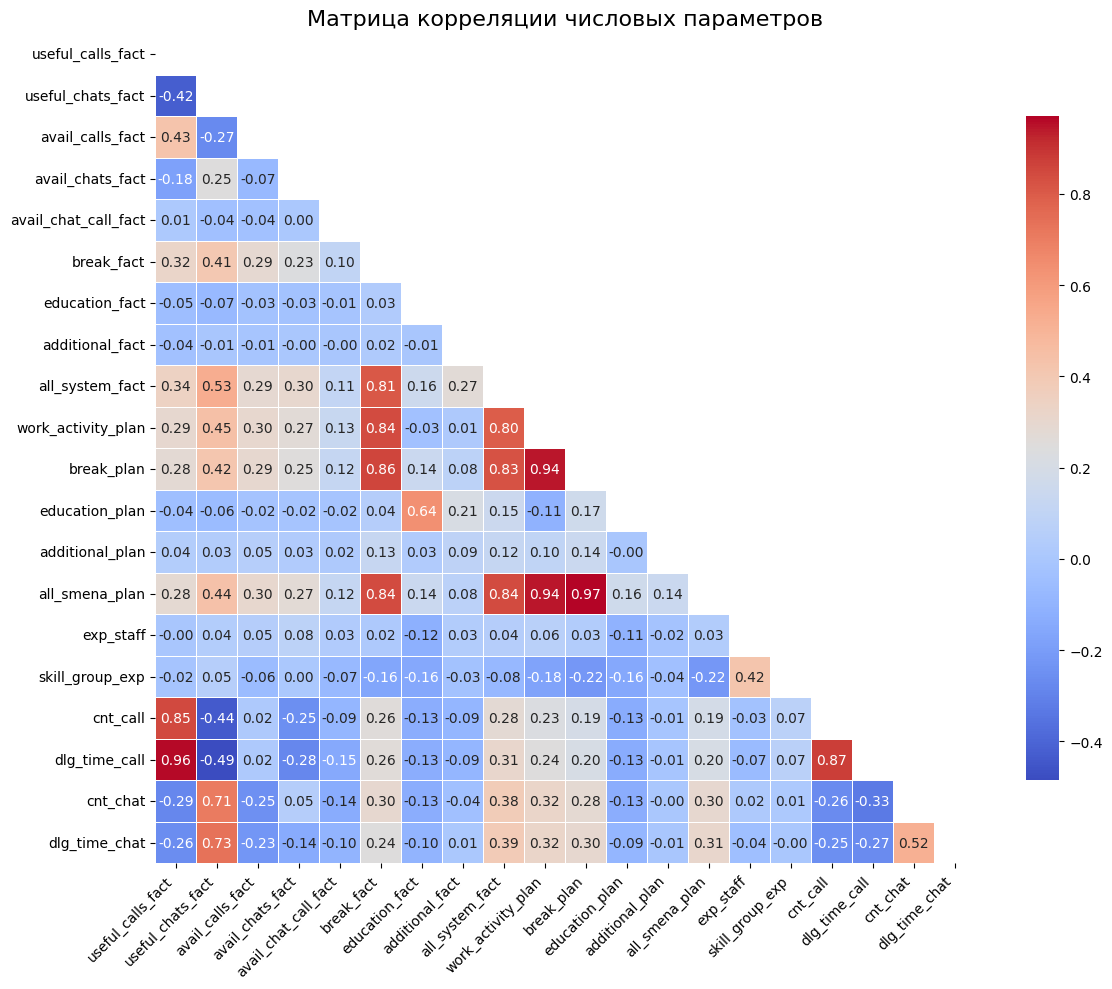

In [13]:
numeric_columns = df.select_dtypes(include=['number'])

# Вычисляем корреляционную матрицу
corr_matrix = numeric_columns.corr()

# Визуализация
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника

# Используем heatmap из seaborn для лучшей визуализации
import seaborn as sns
sns.heatmap(corr_matrix, 
            annot=True,  # Показывать значения
            fmt='.2f',   # Формат значений (2 знака после запятой)
            cmap='coolwarm',  # Цветовая схема
            mask=mask,   # Применяем маску для отображения только нижнего треугольника
            linewidths=0.5,  # Ширина линий между ячейками
            cbar_kws={"shrink": .8})  # Настройка цветовой шкалы

plt.title('Матрица корреляции числовых параметров', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()